# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [13]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
%matplotlib inline

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [14]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 615


In [3]:
cities

['bilibino',
 'cabo san lucas',
 'nizhniy kuranakh',
 'praya',
 'bethel',
 'angaur state',
 'waitangi',
 'shimanovsk',
 'dudinka',
 'punta arenas',
 'port elizabeth',
 'guerrero negro',
 'zaysan',
 'edinburgh of the seven seas',
 'cockburn town',
 'adamstown',
 'west island',
 'utrik',
 'kodiak',
 'cidreira',
 'ushuaia',
 'mossel bay',
 'iqaluit',
 'hilo',
 'puerto ayora',
 'lyozna',
 'dire dawa',
 'nyurba',
 'georgetown',
 'vadso',
 'linkou',
 'ancud',
 'port mathurin',
 'sisimiut',
 'port-aux-francais',
 'puerto leguizamo',
 'alofi',
 'hamilton',
 'esil',
 'tofol',
 'albany',
 'tiksi',
 'queenstown',
 'munduk',
 'ilulissat',
 'margaret river',
 'joshimath',
 'saratamata',
 'witzenhausen',
 'kos',
 'chebba',
 'iola',
 'wau',
 'yangor',
 'blackmans bay',
 'petropavlovsk-kamchatsky',
 'degerfors',
 'remire-montjoly',
 'lihue',
 'papatowai',
 'alaghsas',
 'berdigestyakh',
 'puerto natales',
 'el calafate',
 "nar'yan-mar",
 'yanchep',
 'bandarban',
 'olonkinbyen',
 'alesund',
 'padang',
 

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [15]:
api_key = weather_api_key

In [16]:
base_url = 'http://api.openweathermap.org/data/2.5/weather'

In [17]:
# JSON EXAMPLE

city_example = 'san antonio'
city_url = f"{base_url}?q={city_example}&appid={api_key}&units=metric"
response = requests.get(city_url)
city_weather = response.json()
city_weather

{'coord': {'lon': -98.4936, 'lat': 29.4241},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 29.41,
  'feels_like': 32.28,
  'temp_min': 28.6,
  'temp_max': 30.66,
  'pressure': 1016,
  'humidity': 63,
  'sea_level': 1016,
  'grnd_level': 992},
 'visibility': 10000,
 'wind': {'speed': 4.12, 'deg': 180},
 'clouds': {'all': 0},
 'dt': 1724638452,
 'sys': {'type': 1,
  'id': 5857,
  'country': 'US',
  'sunrise': 1724587691,
  'sunset': 1724634244},
 'timezone': -18000,
 'id': 4726206,
 'name': 'San Antonio',
 'cod': 200}

In [18]:
# Set the API base URL

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{base_url}?q={city}&appid={api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | xiongzhou
Processing Record 2 of Set 1 | sayula de aleman
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | whitehorse
Processing Record 5 of Set 1 | sydney
Processing Record 6 of Set 1 | malindi
Processing Record 7 of Set 1 | karasuk
Processing Record 8 of Set 1 | sao vicente
Processing Record 9 of Set 1 | bang nam priao
Processing Record 10 of Set 1 | kavaratti
Processing Record 11 of Set 1 | petropavlovsk-kamchatsky
Processing Record 12 of Set 1 | puerto natales
Processing Record 13 of Set 1 | nizhniy lomov
Processing Record 14 of Set 1 | bodaybo
Processing Record 15 of Set 1 | vilyuchinsk
Processing Record 16 of Set 1 | touros
Processing Record 17 of Set 1 | avarua
Processing Record 18 of Set 1 | i-n-salah
Processing Record 19 of Set 1 | tiksi
Processing Record 20 of Set 1 | teni
Processing Record 21 of Set 1 | thompson
Processing Record 22 of Set 1 | callao
Proc

In [19]:
city_data

[{'City': 'xiongzhou',
  'Lat': 25.1167,
  'Lng': 114.3,
  'Max Temp': 31.17,
  'Humidity': 68,
  'Cloudiness': 1,
  'Wind Speed': 1.28,
  'Country': 'CN',
  'Date': 1724638617},
 {'City': 'sayula de aleman',
  'Lat': 17.8667,
  'Lng': -94.95,
  'Max Temp': 24.73,
  'Humidity': 89,
  'Cloudiness': 95,
  'Wind Speed': 1.4,
  'Country': 'MX',
  'Date': 1724638618},
 {'City': 'port-aux-francais',
  'Lat': -49.35,
  'Lng': 70.2167,
  'Max Temp': 4.16,
  'Humidity': 85,
  'Cloudiness': 90,
  'Wind Speed': 15.55,
  'Country': 'TF',
  'Date': 1724638619},
 {'City': 'whitehorse',
  'Lat': 60.7161,
  'Lng': -135.0538,
  'Max Temp': 14.43,
  'Humidity': 67,
  'Cloudiness': 75,
  'Wind Speed': 7.72,
  'Country': 'CA',
  'Date': 1724638487},
 {'City': 'sydney',
  'Lat': -33.8679,
  'Lng': 151.2073,
  'Max Temp': 24.69,
  'Humidity': 32,
  'Cloudiness': 0,
  'Wind Speed': 0.89,
  'Country': 'AU',
  'Date': 1724638492},
 {'City': 'malindi',
  'Lat': -3.2175,
  'Lng': 40.1191,
  'Max Temp': 23.85,
  

In [20]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          587
Lat           587
Lng           587
Max Temp      587
Humidity      587
Cloudiness    587
Wind Speed    587
Country       587
Date          587
dtype: int64

In [21]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,xiongzhou,25.1167,114.3000,31.17,68,1,1.28,CN,1724638617
1,sayula de aleman,17.8667,-94.9500,24.73,89,95,1.40,MX,1724638618
2,port-aux-francais,-49.3500,70.2167,4.16,85,90,15.55,TF,1724638619
3,whitehorse,60.7161,-135.0538,14.43,67,75,7.72,CA,1724638487
4,sydney,-33.8679,151.2073,24.69,32,0,0.89,AU,1724638492


In [22]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [23]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,xiongzhou,25.1167,114.3000,31.17,68,1,1.28,CN,1724638617
1,sayula de aleman,17.8667,-94.9500,24.73,89,95,1.40,MX,1724638618
2,port-aux-francais,-49.3500,70.2167,4.16,85,90,15.55,TF,1724638619
3,whitehorse,60.7161,-135.0538,14.43,67,75,7.72,CA,1724638487
4,sydney,-33.8679,151.2073,24.69,32,0,0.89,AU,1724638492


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

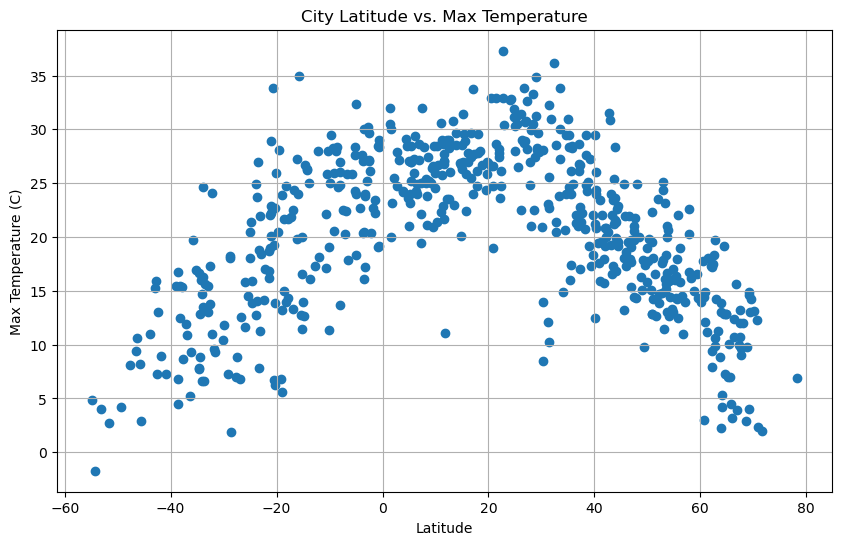

<Figure size 640x480 with 0 Axes>

In [24]:
plt.figure(figsize=(10,6))

# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'])

# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')

# Add grid
plt.grid(True)

# Show plot
plt.show()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

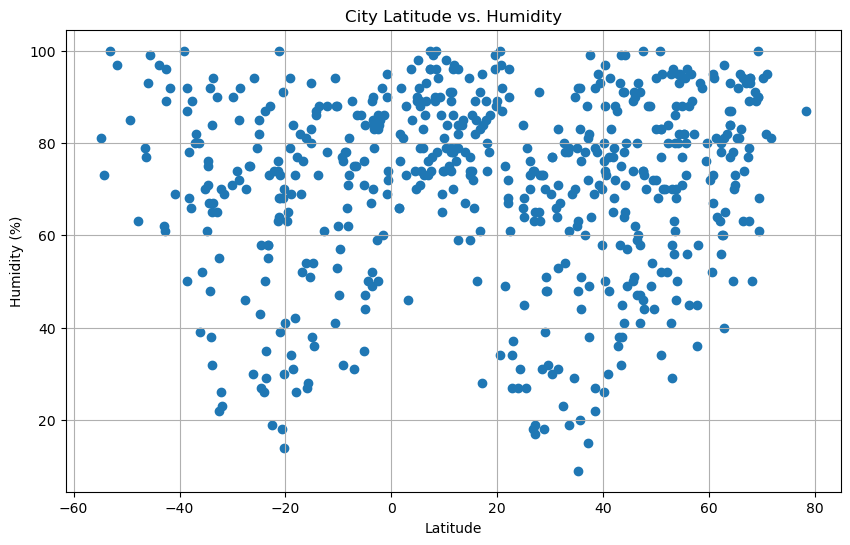

In [25]:
plt.figure(figsize=(10,6))

# Build scatter plot for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'])

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Add grid
plt.grid(True)

plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

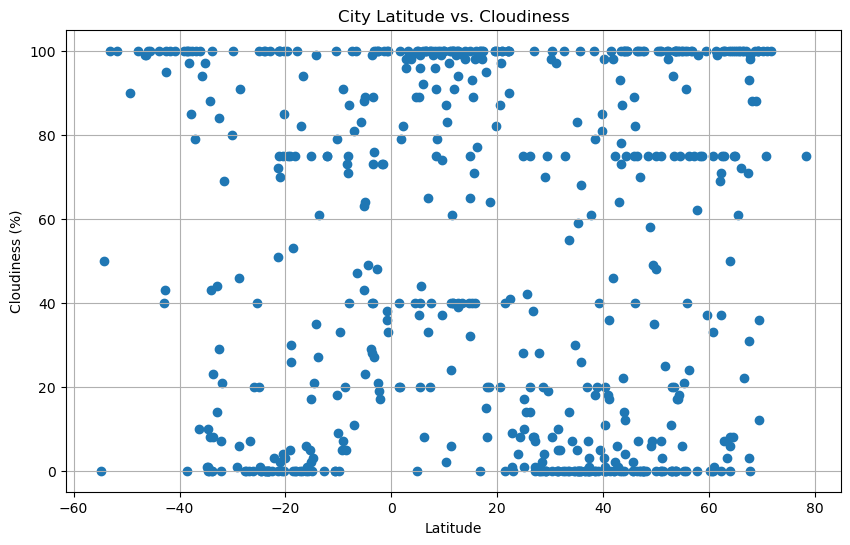

In [26]:
plt.figure(figsize=(10,6))

# Build scatter plot for latitude vs. wind speed 
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'])

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Add grid
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

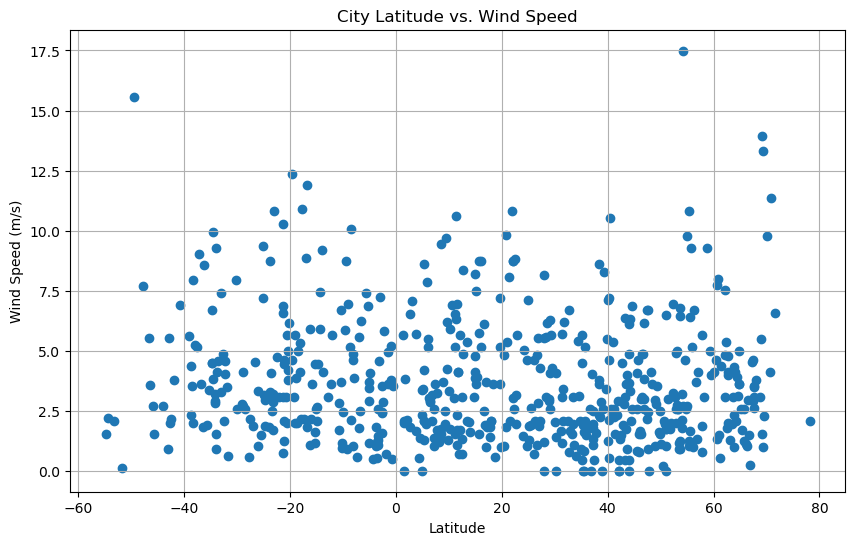

In [27]:
plt.figure(figsize=(10,6))

# Build scatter plot for latitude vs. windspeed 
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'])

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

# Add grid
plt.grid(True)

plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [28]:
# Define a function to create Linear Regression plots
def linear_reg(df, col1, col2, x_label, y_label, title):
    x_values = df[col1]
    y_values = df[col2]
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(f"The r-squared is: {rvalue**2}")
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq, (x_values.min() + 0.05 * (x_values.max() - x_values.min()), 
                           y_values.min() + 0.95 * (y_values.max() - y_values.min())), 
                 fontsize=15, color="red")    
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [29]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
north_hem=city_data_df[city_data_df['Lat']>=0]
north_hem.head()
# Display sample data
# northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,xiongzhou,25.1167,114.3000,31.17,68,1,1.28,CN,1724638617
1,sayula de aleman,17.8667,-94.9500,24.73,89,95,1.40,MX,1724638618
3,whitehorse,60.7161,-135.0538,14.43,67,75,7.72,CA,1724638487
6,karasuk,53.7377,78.0403,13.04,88,100,6.45,RU,1724638624
8,bang nam priao,13.8474,101.0531,28.59,78,98,2.03,TH,1724638626


In [30]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
south_hem=city_data_df[city_data_df['Lat']<0]
south_hem.head()
# Display sample data
south_hem.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,port-aux-francais,-49.3500,70.2167,4.16,85,90,15.55,TF,1724638619
4,sydney,-33.8679,151.2073,24.69,32,0,0.89,AU,1724638492
5,malindi,-3.2175,40.1191,23.85,84,76,4.56,KE,1724638623
7,sao vicente,-23.9631,-46.3919,12.77,26,100,1.82,BR,1724638625
11,puerto natales,-51.7236,-72.4875,2.67,97,100,0.13,CL,1724638630


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.5518956140881358


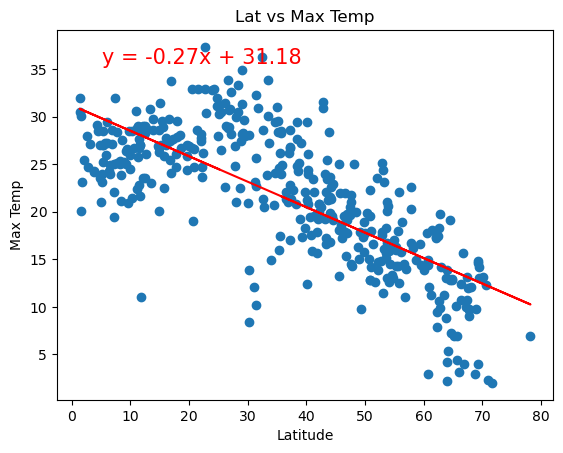

In [31]:
# Linear regression on Northern Hemisphere
linear_reg(north_hem, 'Lat', 'Max Temp', 'Latitude', 'Max Temp', 'Lat vs Max Temp')

The r-squared is: 0.5087425645331634


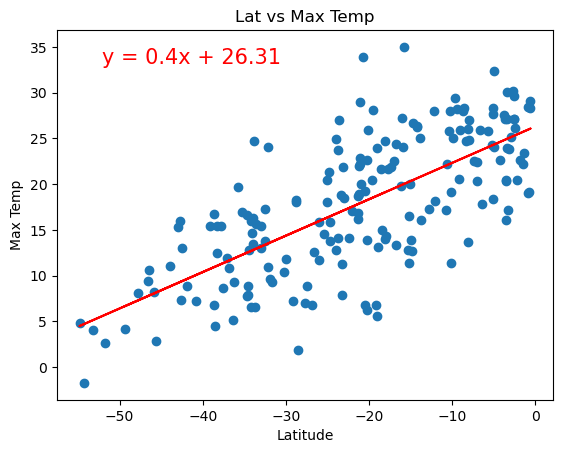

In [32]:
# Linear regression on Southern Hemisphere
linear_reg(south_hem, 'Lat', 'Max Temp', 'Latitude', 'Max Temp', 'Lat vs Max Temp')

**Discussion about the linear relationship:** The releationship between the northern and southern hemispheres is that as you get closer to the equator the temperature increases. As you get further away, the temperature decreases.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.0020793287454195096


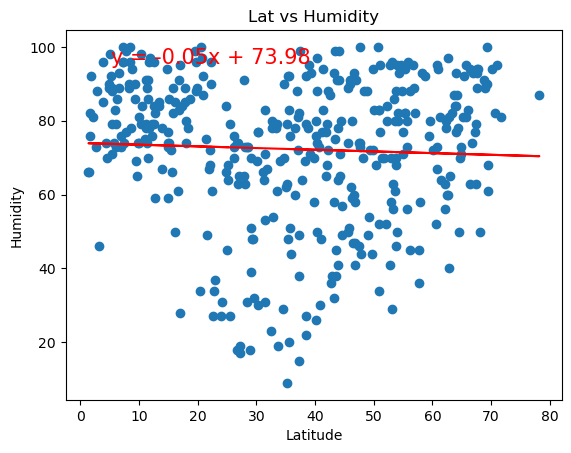

In [33]:
# Northern Hemisphere
linear_reg(north_hem, 'Lat', 'Humidity', 'Latitude', 'Humidity', 'Lat vs Humidity')

The r-squared is: 0.004270726305830675


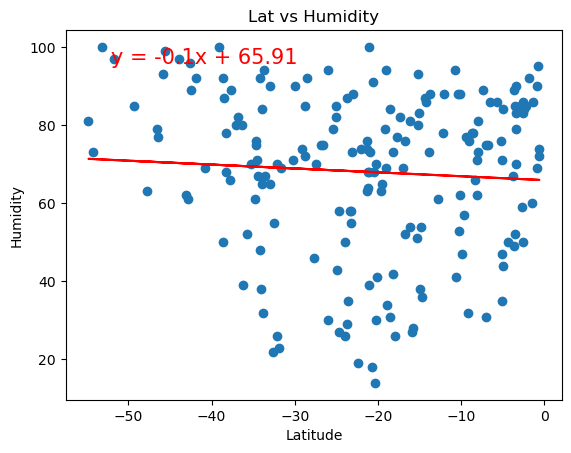

In [34]:
# Southern Hemisphere
linear_reg(south_hem, 'Lat', 'Humidity', 'Latitude', 'Humidity', 'Lat vs Humidity')

**Discussion about the linear relationship:** The relative humidity is relatively similar in both northern and southern 
hemispheres. In the northern hemisphere the humidity stays about the same from the equator to the furthest distance away. There 
is only a slight decrease in humidity in the southern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.008189119676884198


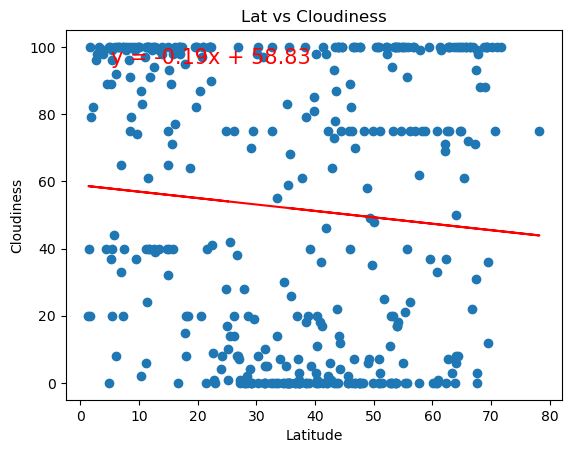

In [35]:
# Northern Hemisphere
linear_reg(north_hem, 'Lat', 'Cloudiness', 'Latitude', 'Cloudiness', 'Lat vs Cloudiness')

The r-squared is: 0.006595617965545626


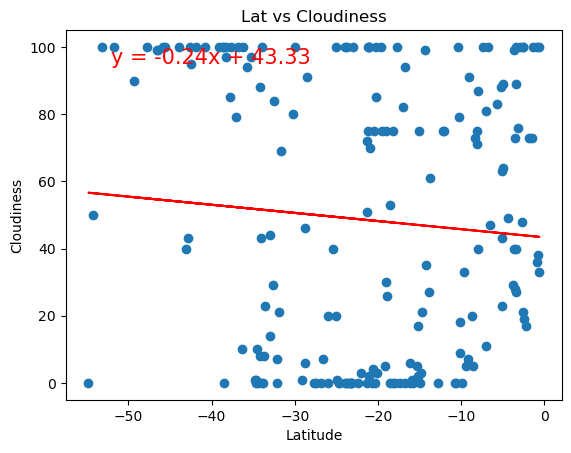

In [36]:
# Southern Hemisphere
linear_reg(south_hem, 'Lat', 'Cloudiness', 'Latitude', 'Cloudiness', 'Lat vs Cloudiness')

**Discussion about the linear relationship:** The cloudiness linear relationship is very similar in norther and southern
hemispheres.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 3.25484954557124e-05


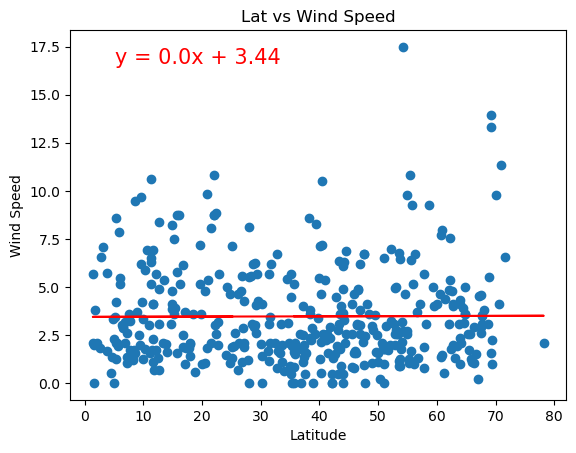

In [37]:
# Northern Hemisphere
linear_reg(north_hem, 'Lat', 'Wind Speed', 'Latitude', 'Wind Speed', 'Lat vs Wind Speed')

The r-squared is: 0.009279597587655461


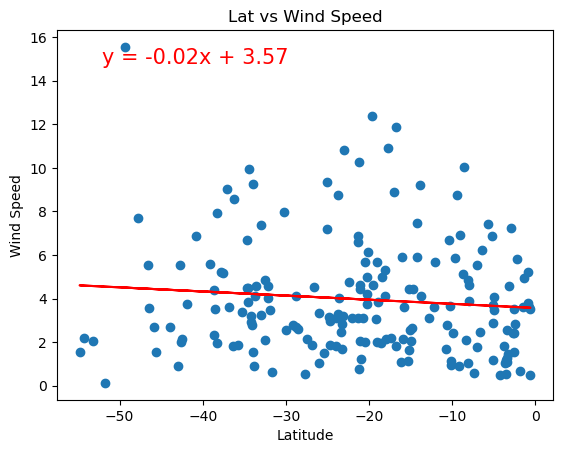

In [38]:
# Southern Hemisphere
linear_reg(south_hem, 'Lat', 'Wind Speed', 'Latitude', 'Wind Speed', 'Lat vs Wind Speed')

**Discussion about the linear relationship:** Both R-squared values are very low, indicating that in both cases, the linear regression models do a poor job of explaining the variance.